# Simulating Chaotic Circuit in Python

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
import scipy.interpolate as interpolate
from tools import Circuit, local_max, unique_maxs, phase_diagram, find_splitting
from datetime import datetime as dt
import pytz # for seting datetime timezone

### Test Circuit, Time Series &amp; Phase Portrait

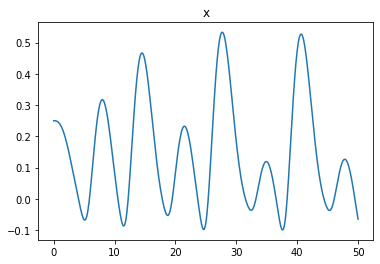

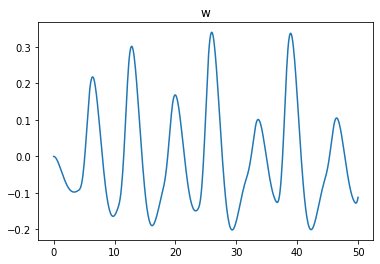

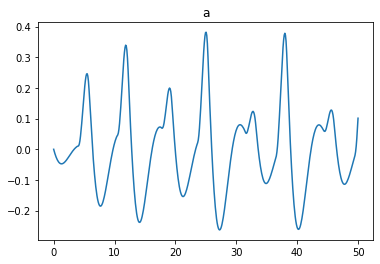

0.00047


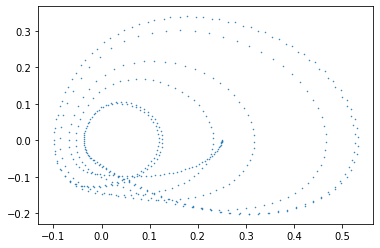

In [2]:
#initiate instance of class
test = Circuit(66.5,C = 10e-9)
#choose x to solve for
x = np.linspace(0,50,500)
y0 = [0.25, 0, 0]
tspan = (0, max(x))

#solve the ODE and plot
sol = test.solve(tspan, y0, plot = True, phase = False, t_eval = x)
print(test.Tc)
phase_diagram(sol, '.', markersize = 1)


### Generate Power Spectrum

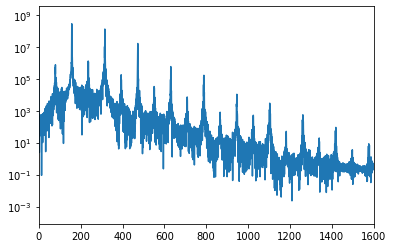

In [3]:
# Power Spectrum Code Sampled From https://stackoverflow.com/questions/15382076/plotting-power-spectrum-in-python

circuit = Circuit(66.5,C = 10e-9)
time_arr = np.linspace(200,5200,200000)
y0 = [0.25, 0, 0]
tspan = (0, max(time_arr))
sol = circuit.solve(tspan, y0,  t_eval = time_arr)
timestep = max(time_arr)/len(time_arr)


p = np.abs(np.fft.rfft(sol.y[0]))**2 #xdat is in volts and power = V^2 / R so is perportional up to a resistance
f = np.linspace(0,1/(timestep*circuit.Tc*2),len(p))
plt.plot(f, p)


plt.xlim(0,1600)
plt.yscale("log")

[2.81708594e+08 1.31245588e+08 1.63496260e+07 5.87722106e+05
 1.66610656e+05 1.07810261e+04 2.98462700e+03 5.58611977e+02
 9.09397950e+01 8.52472545e+00 2.20143683e+00 2.56347032e+00
 2.34931688e+00 1.29956620e+00]
[ 385  771 1156 1541 1928 2313 2697 3084 3469 3854 4234 4620 5010 5396]


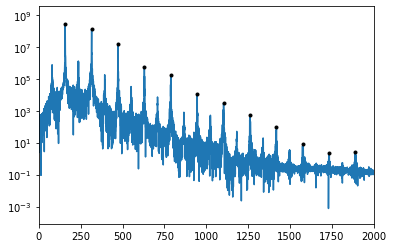

In [4]:
plt.plot(f, p)
plt.xlim(0,2000)
plt.yscale("log")

maxs, indexes = local_max(p[:6000], N = 300)
print(maxs)
print(indexes)

plt.plot(f[indexes], maxs, 'k.')
lowest_f = f[indexes[0]]



### Generate Bifurcation Plot

In [5]:
#initiate range of Rv values to cover
Rv_arr = np.arange(40,120,0.1)
#initial conditions
y0 = [0.25, 0, 0]
#points to solve for
time_arr = np.linspace(700,1500,2000)
tspan = (0, max(time_arr))

#generate the bifurcation data
bifurcation = circuit.bifurcation(Rv_arr, tspan, y0, t_eval = time_arr, N = 400, rtol = 1e-9, error_tol = 3e-3)
print(len(bifurcation))

800
/work/Analysis/tools.py:154: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(ret)


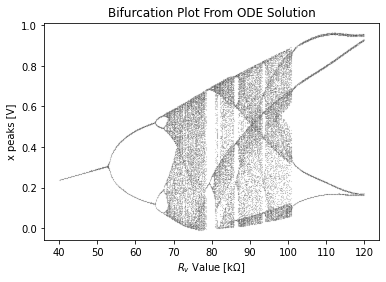

[121 249 274 295 334]
bifurcation points: [52.1 64.9 67.4 69.5 73.4]


In [6]:
#plot bifurcation data
for Rv, bif in zip(Rv_arr, bifurcation):
    plt.plot(Rv*np.ones(len(bif)), bif, 'k.', markersize = 0.1)


plt.title("Bifurcation Plot From ODE Solution") # ye
plt.ylabel("x peaks [V]")
plt.xlabel(r"$R_v$ Value [k$\Omega$]")

tz = pytz.timezone('US/Pacific')
dateString = str(dt.now(tz).date())


plt.savefig("/work/Notes/Final_Summary/"+dateString+"-simBifurcations.png",dpi = 600)
plt.show()

#find splitting points
indexes = find_splitting(bifurcation)
print(indexes)
bifurcation_points = Rv_arr[indexes]
print(f"bifurcation points: {bifurcation_points}")

Rv_arr_full = Rv_arr
bif_arr_full = bifurcation

# Finding first feigenbaum constant

[4.0703125 5.12      5.       ]


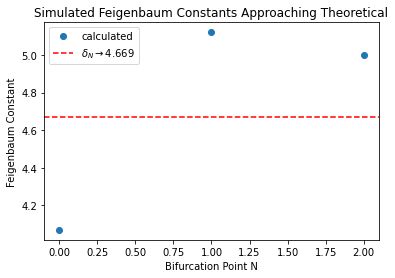

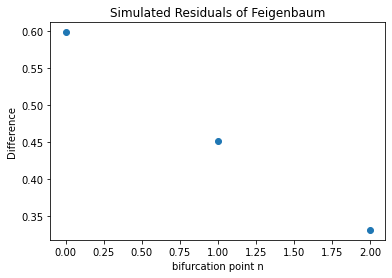

In [7]:
a = [52.1, 64.9, 67.4, 67.9]
feig = []
for i in range(len(a) - 1):
    if i == 0:
        feig.append(a[i]/abs(a[i] - a[i+1]))

    else:
        feig.append((a[i] - a[i-1])/abs(a[i] - a[i+1]))

feig = np.array(feig)
print(feig)
dif_feig = abs(feig - 4.669)
plt.plot(feig, 'o', label = 'calculated')
plt.axhline(4.669201609102990671853203820466,linestyle = "dashed",color = "Red", label = r'$\delta_{N} \rightarrow 4.669$')
plt.title('Simulated Feigenbaum Constants Approaching Theoretical')
plt.xlabel('Bifurcation Point N')
plt.ylabel('Feigenbaum Constant')
plt.legend()
plt.savefig("/work/Notes/Final_Summary/"+dateString+"-simulatedFirstFeigenbaum.png",dpi = 600)
plt.savefig('/work/Notes/Simulation/feigenbaum1.png')

plt.show()

plt.plot(dif_feig, 'o')
plt.title('Simulated Residuals of Feigenbaum')
plt.ylabel('Difference')
plt.xlabel('bifurcation point n')
plt.savefig('/work/Notes/Simulation/res_feigenbaum1.png')


# def exponential(x,l,a):
#     return a*np.exp(-x/l)

# x = np.ones(len(feig))
# pOpt, pCov = curve_fit(exponential, x, dif_feig , p0 = [3.5,0.8])

# print(pOpt)
# dx = np.linspace(0,10,1000)
# dy = exponential(dx, *[3.5,max(dif_feig)])


# plt.plot(dx,dy)


In [8]:
circuit2 = Circuit(66,C = 10e-9)
Rv_arr = np.arange(67.8, 68.2,0.001) 
y0 = [0.25, 0, 0]
time_arr = np.linspace(1200,1500,2000)
tspan = (0, max(time_arr))
bifurcation = circuit2.bifurcation(Rv_arr, tspan, y0, t_eval = time_arr, N = 400, rtol = 1e-9)
print(len(bifurcation))

401
/work/Analysis/tools.py:154: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(ret)


Text(0.5, 0, '$R_v$ Value [k$\\Omega$]')

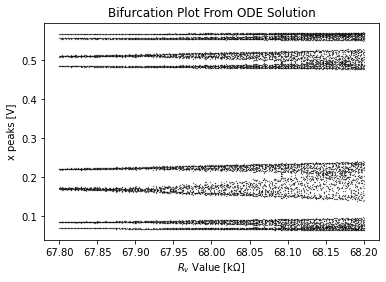

In [9]:
for Rv, bif in zip(Rv_arr, bifurcation):
    plt.plot(Rv*np.ones(len(bif)), bif, 'k.', markersize = 0.5)
                                                                                                         

plt.title("Bifurcation Plot From ODE Solution") # ye
plt.ylabel("x peaks [V]")
plt.xlabel(r"$R_v$ Value [k$\Omega$]")

# Getting Second Feigenbaum Constant

In [10]:
new_circuit = Circuit(75,C = 10e-9)
time_arr = np.linspace(1000,1500,140000)
y0 = [0.25, 0, 0]
tspan = (0, max(time_arr))
sol = new_circuit.solve(tspan, y0,  t_eval = time_arr)

with open('/work/Data_experimental/sim_data.txt', 'w') as outfile:
    
    for t,y_prime,y in zip(sol.t, -sol.y[1], sol.y[0]):
        outfile.write(f"{t - 1000},{y_prime},{y}\n")
        
    print('done')


done


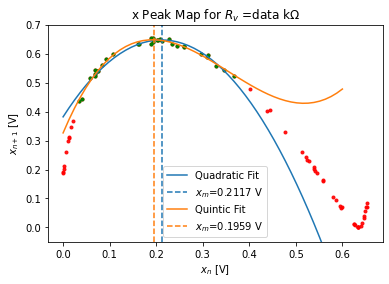

[0.19347954]


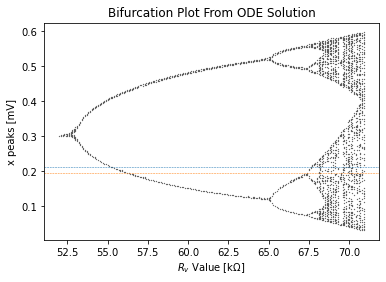

In [11]:
filename = "/work/Data_experimental/sim_data.txt"
Rv_val = filename.split("_")[-1]
Rv_val = Rv_val.split(".")[0]
t, negative_x_prime, x = np.genfromtxt(filename, skip_header = 12, delimiter = ',', unpack = True)
peaks,_ = local_max(x,N=10)
filteredPeaks = np.array([])
one_to_onePeaks = np.array([])
thresh = 0.01


for idx,diff in zip(range(len(peaks)-1),np.diff(peaks)):
    if np.abs(diff) >= thresh:
        filteredPeaks = np.append(filteredPeaks,peaks[idx])
    else:
        one_to_onePeaks = np.append(one_to_onePeaks,peaks[idx])


# Only peaks that stay the same amplitude within noise threshold
x_n_array = one_to_onePeaks[:-1]
x_nplus_array = one_to_onePeaks[1:]
plt.plot(x_n_array,x_nplus_array,"b.");

# Only peaks that are different by the noise threshold or more
x_n_array = filteredPeaks[:-1]
x_nplus_array = filteredPeaks[1:]
plt.plot(x_n_array,x_nplus_array,"r.",alpha=0.9);

def quadModel(x,a,b,c):
    return a*x**2 + b*x+c
def quadVertexFinder(a,b,c):
    """y' = 2ax + b = 0"""
    return -b/(2*a)
def quintModel(x,a,b,c,d):
    return a*x**3 + b*x**2+c*x+d

yminVal = 0.4
xmaxVal = 0.4
fit_y = x_nplus_array[np.logical_and(x_nplus_array > yminVal,x_n_array < xmaxVal)]
fit_x = x_n_array[np.logical_and(x_nplus_array > yminVal,x_n_array < xmaxVal)]
plt.plot(fit_x,fit_y,"g.")

# Fit quadratic
pOpt, pCov = curve_fit(quadModel, fit_x,fit_y, p0 = [-0.2,0.05, 0.05])
quadFitVertex = quadVertexFinder(pOpt[0],pOpt[1],pOpt[2])
# Fit Quintic
pOptN, pCovN = curve_fit(quintModel, fit_x,fit_y, p0 = [-0.2,0.05, 0.05,0.05])
#print(pOpt)

# Get fitted lines
x_fitted = np.linspace(0,0.6,50)
y_fitted = quadModel(x_fitted,pOpt[0],pOpt[1],pOpt[2])
y_fittedN = quintModel(x_fitted,pOptN[0],pOptN[1],pOptN[2],pOptN[3])
quintFitVertex_amp, quintFitVertex_idx = local_max(y_fittedN,N=2)
quintFitVertex = x_fitted[quintFitVertex_idx][0]

# plot
plt.plot(x_fitted,y_fitted,color = "C0",label = "Quadratic Fit");
plt.axvline(quadFitVertex,color = "C0",linestyle = "dashed",label =r"$x_m$="+str(np.around(quadFitVertex,4)) + " V");
plt.plot(x_fitted,y_fittedN,color = "C1",label = "Quintic Fit");
plt.axvline(quintFitVertex,color = "C1",linestyle = "dashed",label =r"$x_m$="+str(np.around(quintFitVertex,4)) + " V");
plt.title(r"x Peak Map for $R_v$ =" + Rv_val + r" k$\Omega$");
plt.ylabel(r"$x_{n+1}$ [V]");
plt.xlabel(r"$x_{n}$ [V]");
plt.legend();
plt.ylim(-0.05,0.7);
plt.savefig("/work/Notes/Final_Summary/"+dateString+"-simPeakMap.png",dpi = 600)
plt.savefig('/work/Notes/Simulation/peak_map.png')
plt.show()

maxy,index = local_max(x_nplus_array, N = 20)

maximum = x_n_array[index]

print(maximum)
for Rv, bif in zip(Rv_arr_full, bif_arr_full):
    if Rv > 52 and Rv < 71:
        plt.plot(Rv*np.ones(len(bif)), bif, 'k.', markersize = 0.5)
plt.axhline(quadFitVertex,color = "C0",label = r"QuadFit $x_m$",linewidth = 0.5,linestyle = "dashed");
plt.axhline(quintFitVertex,color = "C1",label = r"QuintFit $x_m$",linewidth = 0.5,linestyle = "dashed");

plt.title("Bifurcation Plot From ODE Solution") # ye
plt.ylabel("x peaks [mV]")
plt.xlabel(r"$R_v$ Value [k$\Omega$]")
plt.savefig("/work/Notes/Final_Summary/"+dateString+"-simBifrucationSecondFeig.png",dpi = 600)

plt.show()


# Getting some plots to compare

/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:40: UserWarning: The following arguments have no effect for a chosen solver: `error_tol`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


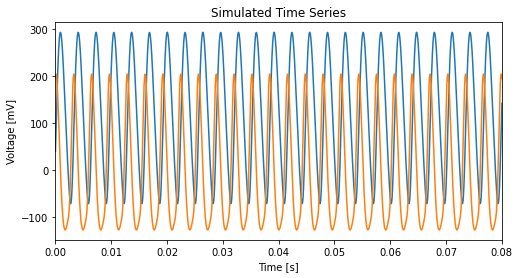

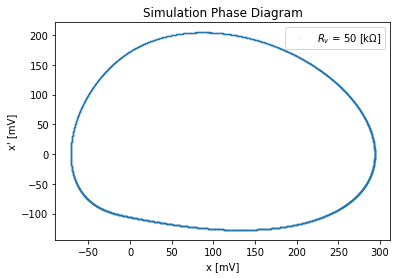

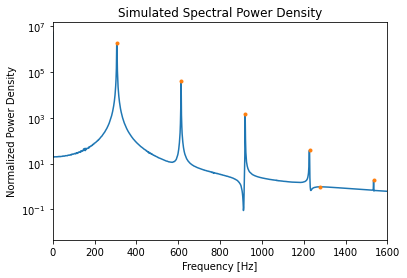

/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:40: UserWarning: The following arguments have no effect for a chosen solver: `error_tol`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


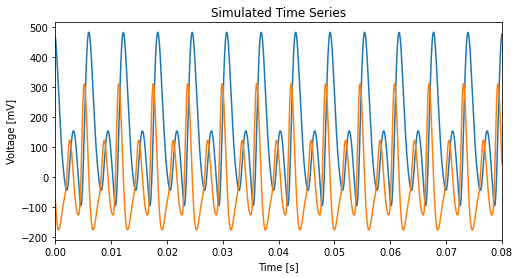

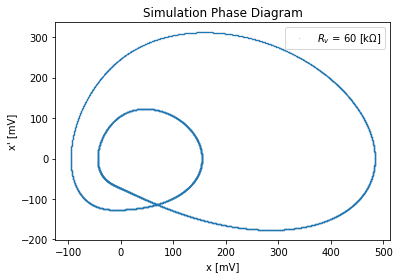

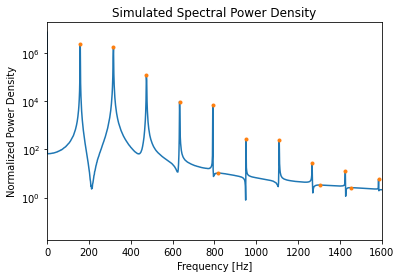

/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:40: UserWarning: The following arguments have no effect for a chosen solver: `error_tol`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


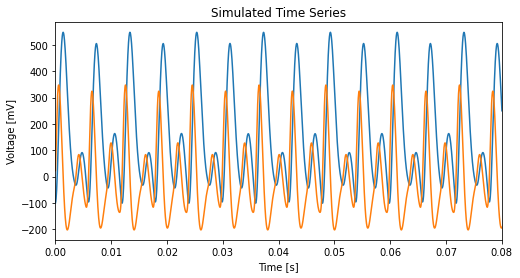

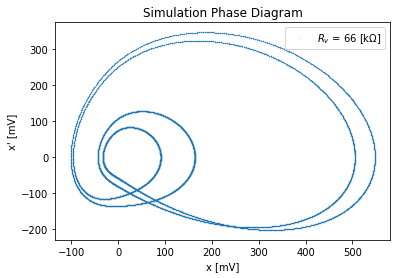

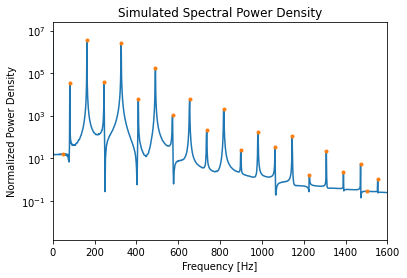

/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:40: UserWarning: The following arguments have no effect for a chosen solver: `error_tol`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


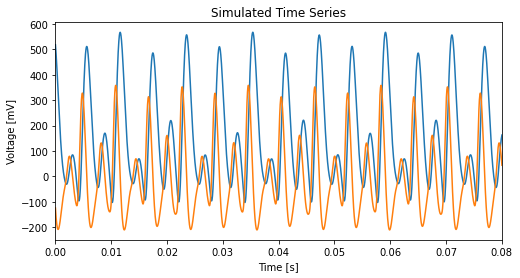

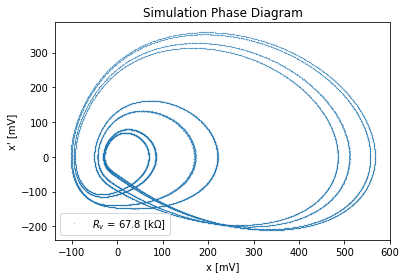

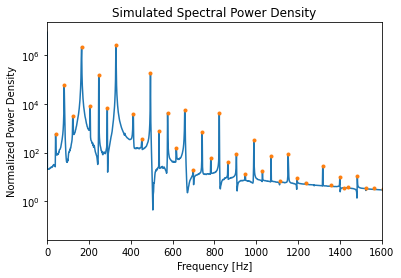

/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:40: UserWarning: The following arguments have no effect for a chosen solver: `error_tol`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


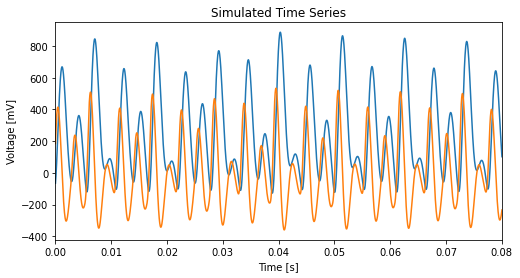

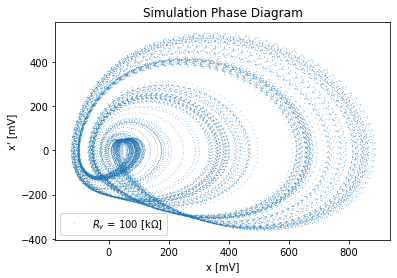

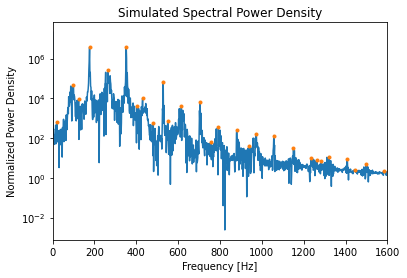

In [12]:
new_circuit = Circuit(40)
y0 = [0.25, 0, 0]
time_arr = np.linspace(700,2000,20000)
tspan = (0, max(time_arr))
timestep = (max(time_arr) - min(time_arr))/len(time_arr)

primaryCol = "C0"
secondaryCol = "C1"
tertiaryCol = "C2"
endTime = 0.08 # plot time series up to this time in real seconds (t_real = t~ * RC)
upperFrequency = 16000 # uppermost frequency to plot in the spectral density plot in real seconds

# Time plot values
Tau = 460*10**(-6) # time constant
t_max = endTime

Rv_arr = [50,60,66,67.8,100] # chosen from avalieble experimental values
for Rv in Rv_arr:
    fig, ax = plt.subplots(figsize = (8,4))
    new_circuit.Rv = Rv
    sol = new_circuit.solve(tspan, y0,  t_eval = time_arr, rtol = 1e-9, error_tol = 3e-3)
    sol.t = sol.t - min(time_arr)
    plt.plot(sol.t*Tau,sol.y[0]*1000, markersize = 0.5,color = primaryCol,label = "x")
    plt.plot(sol.t*Tau,sol.y[1]*1000, markersize = 0.2,color = secondaryCol,label = "x'")
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [mV]')
    plt.title('Simulated Time Series')#\nRv = ' + str(Rv))
    plt.xlim(0,t_max)
    plt.savefig("/work/Notes/Final_Summary/"+dateString+"-Simulation-"+str(Rv)+"_Time.png",dpi = 600)
    plt.savefig('/work/Notes/Simulation/plots_Rv'+str(Rv)+'_time.png')
    plt.show()

    fig, ax = plt.subplots(figsize = (6,4))
    plt.plot(sol.y[0]*1000, sol.y[1]*1000,'.', markersize = 0.25,color = primaryCol,label = r"$R_v$ = "+str(Rv) + r" [k$\Omega$]")
    plt.xlabel("x [mV]")
    plt.ylabel("x' [mV]")
    plt.legend()
    plt.title('Simulation Phase Diagram')#\nRv = ' + str(Rv))
    plt.savefig("/work/Notes/Final_Summary/"+dateString+"-Simulation-"+str(Rv)+"_Phase.png",dpi = 600)
    plt.savefig('/work/Notes/Simulation/plots_Rv'+str(Rv)+'_phase.png')
    plt.show()

    fig, ax = plt.subplots(figsize = (6,4))
    p = np.abs(np.fft.rfft(sol.y[0]))**2 #xdat is in volts and power = V^2 / R so is perportional up to a resistance
    f = np.linspace(0,1/(timestep*circuit.Tc*2),len(p))
    _,peak_idx = local_max(p,N=12)
    plt.plot(f, p,color = primaryCol,label = "Discrete FFT")
    plt.plot(f[peak_idx],p[peak_idx],".",color = secondaryCol,label = "Local Maxs")
    plt.title('Simulated Spectral Power Density')#)\nRv = ' + str(Rv))
    plt.ylabel('Normalized Power Density')
    plt.xlabel('Frequency [Hz]')
    plt.yscale("log")
    plt.xlim(0,1600)
    plt.savefig("/work/Notes/Final_Summary/"+dateString+"-Simulation-"+str(Rv)+"_Spectral.png",dpi = 600)
    plt.savefig('/work/Notes/Simulation/plots_Rv'+str(Rv)+'_power.png')
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4939151a-2261-4374-8b6d-a725368f8dc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>